# Audio Samples

## Summary:

In this tutorial, we'll see how to load audio samples (either from file
urls or numpy arrays) in the front-end and play them with a player or
a sampler.

In [1]:
import ipytone
import numpy as np
import matplotlib.pyplot as plt

## Audio buffers

`AudioBuffer` and `AudioBuffers` can be used to
create one or more audio buffers in the front-end from either files or a numpy
arrays.

### Example 1: load one sample from a numpy array

Let's first create a custom waveform with numpy:

In [2]:
# sine + noise waveform

sample_rate = 44100
duration = 1
frequency = 440

size = int(sample_rate * duration)

factor = frequency * np.pi * 2 / sample_rate
waveform = np.sin(np.arange(size) * factor)
waveform += np.random.uniform(-0.1, 0.1, size=size)

Let's have a look at the waveform:

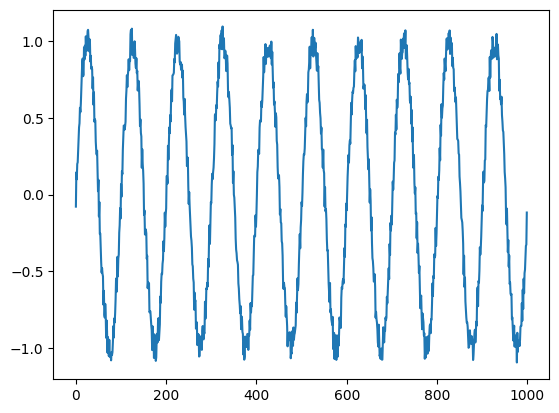

In [3]:
plt.plot(waveform[0:1000]);

We can then directly pass the numpy array to the `AudioBuffer`
constructor:

In [29]:
sine_noise_buffer = ipytone.AudioBuffer(url_or_array=waveform)

> Important: Create a buffer from a numpy array is currently limited to samples
of a duration less or equal to 10 seconds.


### Example 2: load multiple samples from files (urls)

Let's create new buffers from wav or mp3 file urls.

> *Important:* 
Depending on the given urls, creating the buffers may be blocked due to the
server [CORS](https://en.wikipedia.org/wiki/Cross-origin_resource_sharing)
policy.

If you want to load local files from within JupyterLab, you can get a valid url
by going in the file browser, right-click on the file and "Copy Download Link".

In [68]:
# These urls are likely wrong if you've downloaded this notebook and run it locally
base_url = "./"
kick_url = "kick.wav"
snare_url = "snare.wav"

In [69]:
drum_buffers = ipytone.AudioBuffers(
    base_url=base_url,
    urls={"kick": kick_url, "snare": snare_url},
)

Single buffers may be accessed via the `buffers` property, e.g.,

In [70]:
drum_buffers.buffers["kick"]

AudioBuffer(loaded=True, duration=0.30140589569160997)

### Buffer attributes

Audio buffers have a few read-only attributes like `loaded`, `duration`,
`length`, `sample_rate`, etc.

In [71]:
# whether all drum buffers are loaded in the front-end
drum_buffers.loaded

True

In [72]:
# clip duration (in seconds)
drum_buffers.buffers["kick"].duration

0.30140589569160997

In [73]:
# clip length in number of samples
drum_buffers.buffers["kick"].length

13292

And a `reverse` property that can be read or written:

In [74]:
drum_buffers.buffers["kick"].reverse

False

## Player

The `.Player` object is a source audio node for playing samples.

Let's create a new player from the custom sine/noise buffer created above:

In [39]:
player = ipytone.Player(sine_noise_buffer).to_destination()

> NOTE:  We can also directly pass an url to the `Player` constructor,
which will automatically create an audio buffer.

Like any other source, it has `start()` ant `stop()` methods:

In [40]:
player.start().stop("+3")

Player()

It also has some additional properties, e.g., to add fade-in/out, play it
looped, change its playback rate, etc.

In [45]:
player.loop = True
player.fade_in = 0.2
player.playback_rate = 0.5

In [46]:
player.start().stop("+3")

Player()

For convenience, `Players` can be used to create multiple
`Player` instances at once.

Let's create players from the drum buffers created above:

In [75]:
drums = ipytone.Players(drum_buffers.buffers).to_destination()

We can get the individual players with `Players.get_player()`:

In [77]:
drums.get_player("kick").start().stop("+1")
drums.get_player("snare").start("+0.5").stop("+1.5")

Player()

## Sampler

As an alternative to `.Player`, `Sampler` is an
instrument based on samples.

For example, let's create a sampler with the sine/noise buffer created above.
The name of the buffers must correspond to something that can be interpreted
like a musical note.

In [24]:
sampler = ipytone.Sampler({"A4": sine_noise_buffer}, volume=-10).to_destination()

Being an instrument,`Sampler` provides the same interface than
any other instrument (see the [instruments](built-in-instruments) tutorial).
When playing a note, the sampler selects the closest sample and adapts the pitch
to generate the corresponding note.

In [25]:
sampler.trigger_attack_release("C2", 0.2)
sampler.trigger_attack_release("A2", 0.2, time="+0.2")
sampler.trigger_attack_release("C3", 0.2, time="+0.4")
sampler.trigger_attack_release("C4", 0.2, time="+0.6")

Sampler()

`Sampler` is a polyphonic instrument:

In [26]:
# trigger a chord
sampler.trigger_attack_release(["C4", "E4", "G4"], 0.5)

Sampler()

## Dispose buffers

Like for other audio nodes, audio buffers should be disposed if they are not
used anymore.

In [78]:
sine_noise_buffer.dispose()
drum_buffers.dispose()

# note: dispose the player(s) or the sampler
# would also dispose the buffers
player.dispose()
drums.dispose()
sampler.dispose()

Sampler(disposed=True)